# 02_02 Summary statistics and missing value analysis on numeric variables

## Import the initial dataset (without expired records)

In [9]:
%matplotlib inline 
import mpld3
#mpld3.enable_notebook()
import pandas as pd
path=r'noExpired.xlsx'
df=pd.read_excel(path)

## Brief summary of the dataset 

In [10]:
from __future__ import division
print "*****************************************************" 
numAdmitted=len(df)
print "Total number of admissions: %d" %numAdmitted

readmittedPercent=len(df[df['readmitted']==True])/numAdmitted*100
print "Percent of readmission:     %.2f%%" %readmittedPercent

malePercent=df['gender'].str.contains('Male').sum()/numAdmitted*100
print "Percent of male:            %.2f%%. " %malePercent

transferPercent=df['discharge_disposition_id'].str.contains('transferred').sum()/numAdmitted*100
print "Percent of transferred:     %.2f%%" %transferPercent


time_in_hospital=df['time_in_hospital']
print "time in hospital:           mean: %d  std: %d " %(time_in_hospital.mean(),time_in_hospital.std())

*****************************************************
Total number of admissions: 9805
Percent of readmission:     40.44%
Percent of male:            45.97%. 
Percent of transferred:     31.05%
time in hospital:           mean: 4  std: 3 


##  Describe Data

In [11]:
df.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000,9805.000000
mean,4.419684,42.940948,1.390413,15.515553,0.281387,0.114941,0.383988,7.009587,0.404386
std,3.002481,19.427345,1.702996,8.363618,1.106740,0.653386,0.852749,2.026525,0.490798
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000,0.000000
75%,6.000000,57.000000,2.000000,19.000000,0.000000,0.000000,0.000000,9.000000,1.000000
max,14.000000,120.000000,6.000000,81.000000,36.000000,42.000000,10.000000,9.000000,1.000000


## Numercial Feature Distributions

'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfig,ax=plt.subplots()\nnp.random.seed(0)\nx,y=np.random.normal(size=(2,200))\nax.scatter(x,y)\nmpld3.display(fig)\n\n\nimport seaborn as sns\nfig,ax=plt.subplots()\nfigBox=df.boxplot()\n\n'

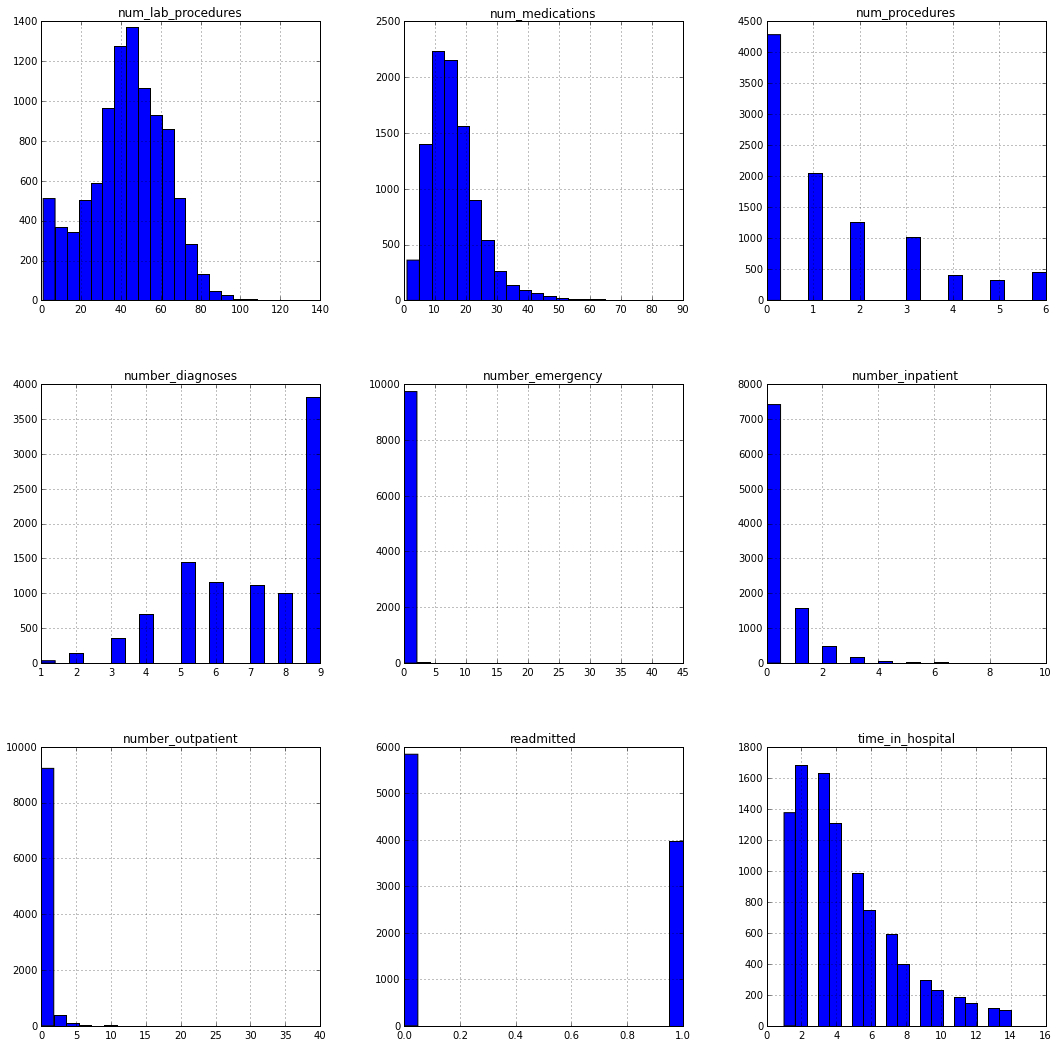

In [12]:
#%matplotlib qt 
import pylab as pl
figHist=df.hist(bins=20,figsize=(18,18))

"""
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots()
np.random.seed(0)
x,y=np.random.normal(size=(2,200))
ax.scatter(x,y)
mpld3.display(fig)


import seaborn as sns
fig,ax=plt.subplots()
figBox=df.boxplot()

"""

## Feature-Class Relationships
### The next important relationship to explore is that of each attribute to the class attribute.
### The numeric variables have different behavior between readmitted class!

readmitted
0    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

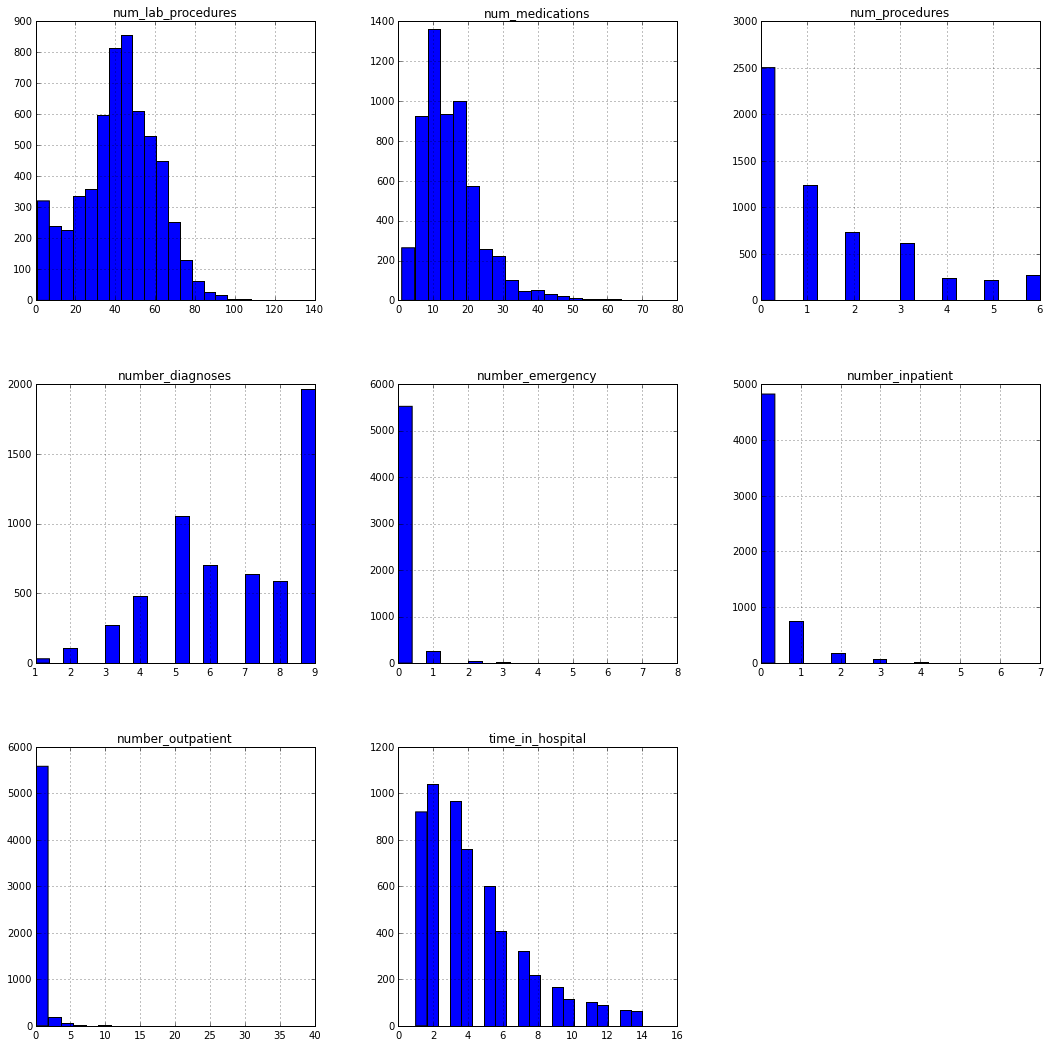

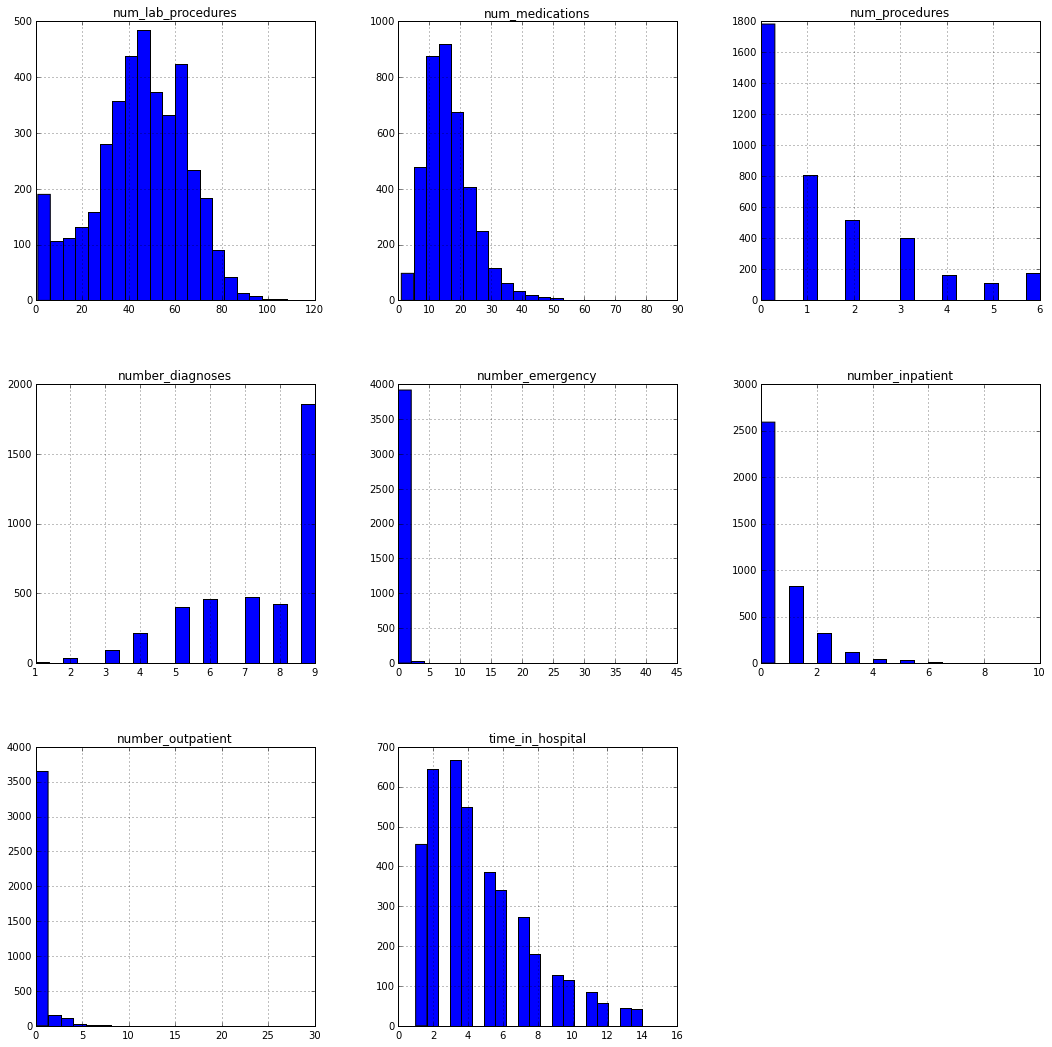

In [13]:
df.groupby('readmitted').hist(bins=20,figsize=(18,18))

## Feature-Feature Relationships
### We can review the relationships between attributes by looking at the distribution of the interactions of each pair of attributes.
### we can see there are no relationship between numeric variables and they are Independent !

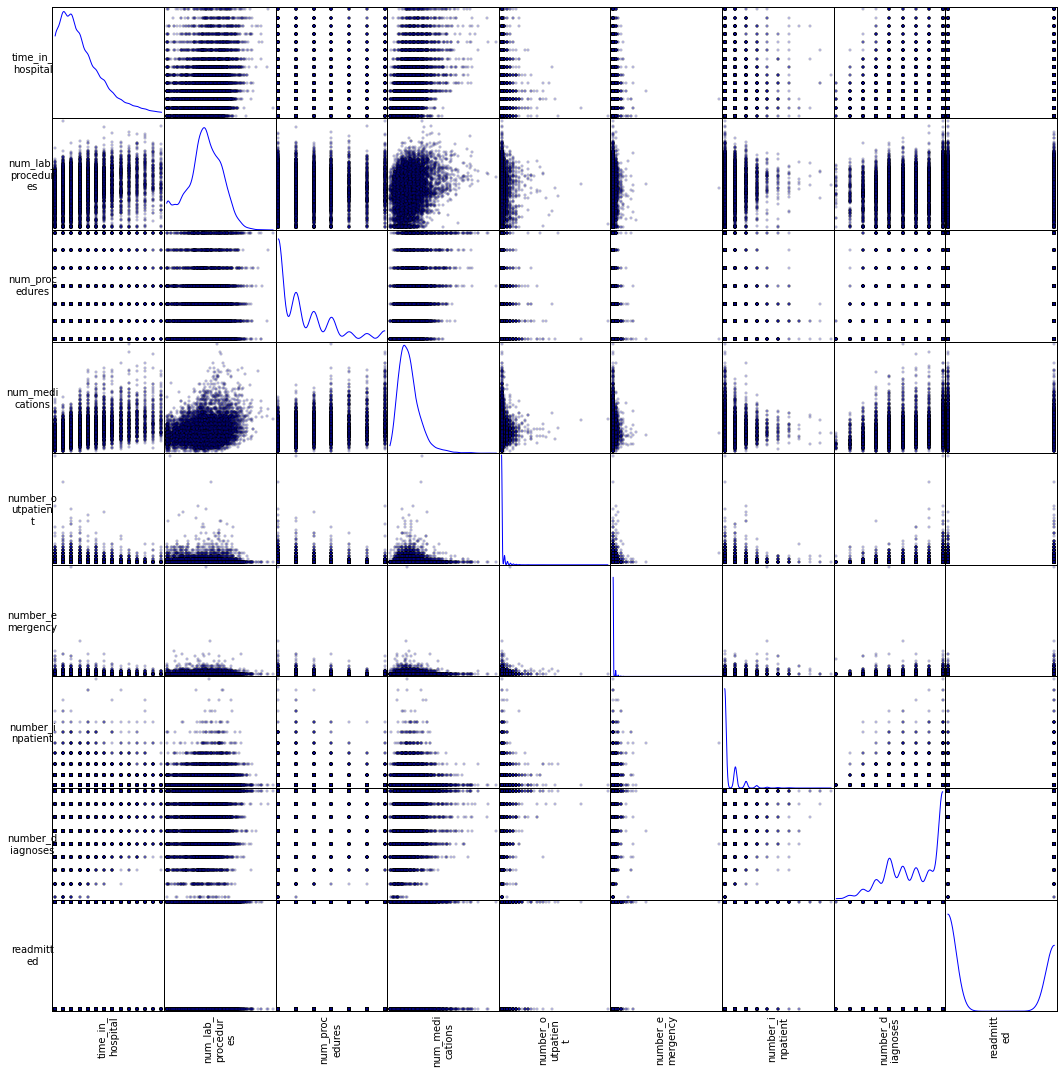

In [8]:
from pandas.tools.plotting import scatter_matrix

axs =scatter_matrix(df, alpha=0.2, figsize=(18, 18), diagonal='kde')

def wrap(txt, width=8):
    '''helper function to wrap text for long labels'''
    import textwrap
    return '\n'.join(textwrap.wrap(txt, width))

for ax in axs[:,0]: # the left boundary
    ax.grid('off', axis='both')
    ax.set_ylabel(wrap(ax.get_ylabel()), rotation=0, va='center', labelpad=20)
    ax.set_yticks([])

for ax in axs[-1,:]: # the lower boundary
    ax.grid('off', axis='both')
    ax.set_xlabel(wrap(ax.get_xlabel()), rotation=90)
    ax.set_xticks([])